***
<left>
    <img style="float: left;" src="module4_heading.jpeg" width="800"></img>
</left>

<br/><br/>
<br/><br/>

### Meanwhile you have learned a lot about Applying DS in Practice already. Go through the following self-study material to discover more examples, deepen your knowledge and broaden your view. Make sure to carefully read through the following text, the more thorough you will go through the summary, the easier you will find the assignment. 

# Learning theory

## Bias-Variance Tradeoff

To begin the discussion we will start with an example. The idea here is that we have a sample of the function $y = -\frac{x^2}{100}+\epsilon$, where $\epsilon$ is a normally distributed error, recall our linear regression example. Since we constructed this example we know that it is a parabola but let us try fitting it with a few different models. The data looks like the following:

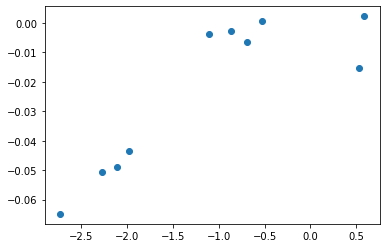

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(30)

x = np.random.normal(-1,1,size=10)
eps = np.random.normal(0,0.6,size=10)
x.sort()
y = -x**2/100+eps/100

plt.scatter(x,y)
plt.show()

Let us try to fit the following models:

* A linear regression model
* A parabola
* A polynomial of the fifth order

In [2]:
def train(x,y,fig,axs,color='blue'):
    from sklearn.linear_model import LinearRegression

    lr1 = LinearRegression()
    lr2 = LinearRegression()
    lr5 = LinearRegression()

    x_lin = np.linspace(np.min(x),np.max(x),20)

    x_2 = np.array([x,x**2]).T
    x_2_lin = np.array([x_lin,x_lin**2]).T

    x_5 = np.array([x,x**2,x**3,x**4,x**5]).T
    x_5_lin = np.array([x_lin,x_lin**2,x_lin**3,x_lin**4,x_lin**5]).T

    lr1.fit(x.reshape(-1,1),y)
    lr2.fit(x_2,y)
    lr5.fit(x_5,y)

    linear_pred_1 = lr1.predict(x_lin.reshape(-1,1))
    linear_pred_2 = lr2.predict(x_2_lin)
    linear_pred_5 = lr5.predict(x_5_lin)

    for ax in axs:
        ax.scatter(x,y,color=color)

    axs[0].plot(x_lin,linear_pred_1,color=color)
    axs[1].plot(x_lin,linear_pred_2,color=color)
    axs[2].plot(x_lin,linear_pred_5,color=color)

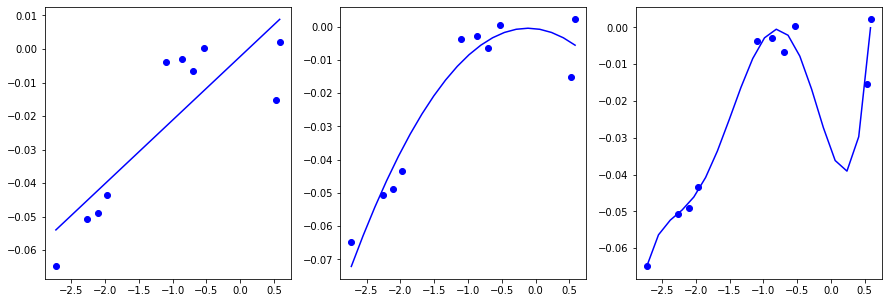

In [3]:
fig,axs = plt.subplots(1,3,figsize=(15,5))
train(x,y,fig,axs)

We will now introduce the concepts **generalization error**, **bias** and **variance** of a model. To do so, say that we are given another sample of our dataset, we will use the orange color for the new one.

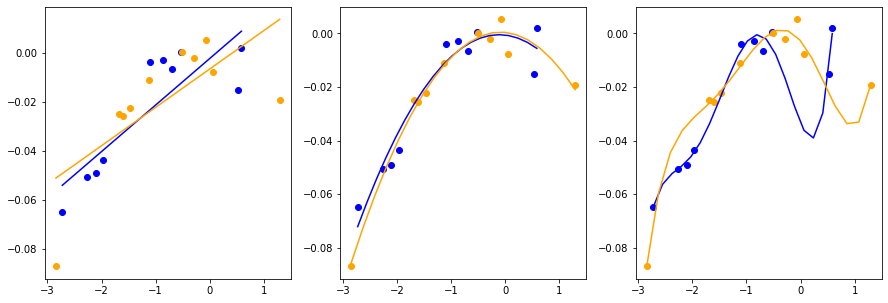

In [4]:
np.random.seed(40)
x_new = np.random.normal(-1,1,size=10)
eps_new = np.random.normal(0,0.6,size=10)
y_new = -x_new**2/100+eps_new/100

fig,axs = plt.subplots(1,3,figsize=(15,5))
train(x,y,fig,axs,'blue')
train(x_new,y_new,fig,axs,'orange')

Note that in the three plots above, the blue data points are used to fit the blue curve and the orange data points are used to fit the orange curve. The generalization error is simply the error of using the blue curve to predict the orange dots. We can make some observations by just looking at the above graphs:

* The blue and orange line do not differ very much, and the fitting error, i.e. the error between the blue curve and blue dots, is of the same "size" as the generalization error, i.e. between the blue curve and the orange data points. Since the model does not fit the training data with a small error, we say, that the model has a large **bias**, while since the two models are almost the same, we can say that the model has small **variance**.
* Almost the same argument applies to the parabola, but here we notice a big decrease in **bias** while the **variance** is also fairly small.
* The third model, i.e. the fifth order polynomial, can almost perfectly fit the data, i.e. the error between the blue data points and the blue curve is very small, while the generalization error, i.e. the error between the blue curve and the orange data points is very large. Furthermore, the two models differ greatly and we can thus say that the third model has a small **bias** and a large **variance**.

<div class="alert alert-info">
    
**Bias:** Informally, we define the bias of a model to be the expected generalization error even if we were to fit it to an infinitely large training set. 
    
</div>

<div class="alert alert-info">

**Variance:** Informally, when fitting the 5th order polynomial as above, there is a large risk that we're fitting to patterns in the data that happened to be present in our small finite training set, as you can see, but that do not reflect the wider pattern of the relationship between x and y.
    
</div>

Often there is a trade-off between bias and variance, heuristically one can say that if the bias is large there is a risk of underfitting the data. With underfitting we mean that we do not capture all structured information in the data. Often having a large bias gives small variance. Conversely, taking a model with small bias, i.e. a model that fits well to the data, there is a risk of overfitting, i.e. finding patterns in the training data which was just random chance. We then say that the model has large variance. So the trade-off is large bias and small variance vs small bias and large variance, the best model is usually a compromise.

A rule of thumb is that if the model has too few parameters it will underfit and the bias will be large, conversely if the model is too complicated it will overfit and have large variance.

In [5]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht)
showURL('https://en.wikipedia.org/wiki/Overfitting',400)

<div class="alert alert-info">
    
**Note:** This is not entirely true, in some cases a complex model will still not overfit and will perform well, while in another case the same model will perform poorly. An example of this is with random forest models but more so with neural networks and in particular large convolutional neural networks (CNN). Why this is so, is actually an open research question.
    
</div>

In [6]:
showURL('https://en.wikipedia.org/wiki/Convolutional_Neural_Network',400)

## How to Select models

Oftentimes it is not possible to know in advance which model will be the most appropriate for a particular dataset. Sometimes we can make a pretty good guess based on careful exploration of the data, as we saw in the simulated second order polynomial data previously. When it is not possible to identify a suitable model through data exploration alone, which is often the case in machine learning, we can instead create a number of different models and select the best one.

The procedure to do these have been discussed in the **Self Study Material** in Module 3, we have learned the technique of **cross validation**: splitting data into a **training set** (used to find the best parameters of each model under consideration by minimizing the cost function), a **validation set** using which we can perform additional tasks (like choosing a model and optimizing hyperparameters) and a strict hold out set called the **test set** (which we can use to estimate the final performance of the chosen model). We have also seen that when thinking about the limitations of data size, it is often better to use flavours of cross validation like **k-fold cross validation** with a value of k chosen between 3 and 10. However, in this Module, following the above discussion on Bias Variance tradeoff, we learn better how to choose the best model using the validation set (or averaged scores from k-fold cross validation): (a) starting with the list of models, we reject overfitted models where the metrics on the validation set are significantly worse than the metrics on the training set, and (b) of the rest, we choose the model with the best metrics on the validation set.

But how do we generate the list of models ? Listed below are some options for how to create different models:
* Use different machine learning methods (see module _Models for Learning_ for examples of additional machine learning methods than those that we have covered so far)
* Feature selection
* Regularization
* Hyperparameter tuning
* Feature engineering (creating new features from existing features) or applying transformations to features

In the following three sections we will further explore feature selection, regularization and hyperparameter tuning. Feature selection and regularization are both important ways in which we can reduce the risk of our model overfitting to the data. Hyperparameter tuning can be used  to control different aspects of model training, including the complexity of resulting model (and thereby the risk of overfitting or underfitting).

## Feature Selection

A possible solution when facing the problem of overfitting and high variance is feature selection. In this section we will give two basic methods for feature selection that you can use to simplify the model without losing too much accuracy.

The problem of finding which subset of the features that would be optimal is usually way too computationally complicated. If you have $n$ features there are $2^n$ combinations of features. So if it takes roughly $1$ minute to complete one model training and you have $100$ features, it would take something in the line of $2^{100} = 1\,267\,650\,600\,228\,229\,401\,496\,703\,205\,376$ minutes, which is clearly ridiculous since it is roughly $10^{14}$ times the age of the universe. 

### Forward search

Forward search is a greedy type algorithm to solve the hard computational problem of choosing features, informally it works by starting with the best feature and then adding the next best and so on. However, this informal description does not do it justice:

1. Decide on how many features you want to include, call that number $m$.
2. Initialize the set of features $\mathcal F = \emptyset$.
3. For $i = 1, \ldots, n$ if feature $i$ is not in $\mathcal F$ then set $\mathcal F_i = \mathcal F \cup \{i\}$ and use for instance cross validation to estimate the generalization error using the features in $\mathcal F_i$.
4. Set $\mathcal F$ to be the $\mathcal F_i$ that has the smallest generalization error
5. If the number of features in $\mathcal F$ is $m$ then stop, otherwise go to 3.
6. Use the resulting $\mathcal F$ as your best feature subset.

The computational complexity of this algorithm is $n_{\text{cv}} \sum_{i=n-m}^n i$, where $n_{\text{cv}}$ is the number of folds in the cross validation. So coming back to the example where it took one minute to complete one run of the prediction algorithm and with a $10$ fold cross validation, it would in the case of $m = 10$ take roughly $10 * \sum_{i=90}^{100} i = 10450$ minutes, this is equivalent to $\approx 7$ days, certainly more doable and on an $8$ core machine this can be completed in $22$ hours.

#### Example of forward search

Let us look at an example of forward search. Note that forward search is not implemented in `scikit-learn`, but there is a `scikit-learn` compatible package that is called `mlxtend`, which is already installed in your environment.

In the example below we have used `sklearn.datasets.make_classification` as a toy example to illustrate forward search, it simply creates a dataset where you can specify what the true answer is. In this case we have specified that three features should be informative and to use $1000$ samples and $2$ classes. We will use a model called `RandomForestClassifier`, we will go through this algorithm in a different chapter. What you need to know is that it is a model used for classification, like the softmax that was explained previously. Then we simply apply the `SequentialFeatureSelector` from the `mlxtend` package and plot the performance of the algorithms.

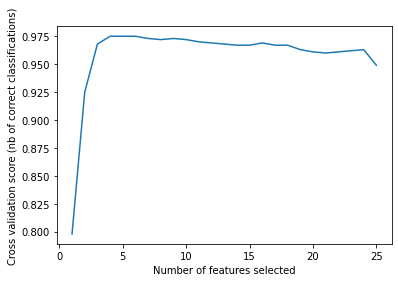

In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
rf = RandomForestClassifier(n_estimators=100)
# The "accuracy" scoring is proportional to the number of correct
# classifications
sfs = SequentialFeatureSelector(rf,k_features=25, forward=True, floating=False, verbose=0, scoring='accuracy', cv=StratifiedKFold(2))

#rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(2),
#              scoring='accuracy')
sfs.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot([subset for subset in sfs.subsets_], [sfs.subsets_[subset]['avg_score'] for subset in sfs.subsets_])
plt.show()

### Backward search

The backward search algorithm is the reversal of the forward search algorithm, this time we start with all features and iteratively evaluate and delete features. It goes like this:

1. Decide on how many features you want to include, call that number $m$ or a lower bound on accuracy.
2. Initialize the set of features $\mathcal F = \{1,\ldots, n\}$.
3. For $i = 1, \ldots, n$ if feature $i$ is in $\mathcal F$ then set $\mathcal F_i = \mathcal F - \{i\}$ and use for instance cross validation to estimate the generalization error using the features in $\mathcal F_i$.
4. Set $\mathcal F$ to be the $\mathcal F_i$ that has the smallest generalization error
5. If the number of features in $\mathcal F$ is $m$ then stop or if the accuracy has dropped below an acceptable threshold use the previous loop's value of $\mathcal F$ and stop, otherwise go to 3.
6. Use the resulting $\mathcal F$ as your best feature subset.

Something important about the backward search algorithm is that the accuracy will decrease with each feature deleted and in excess of setting how many features you want you will most likely need to include a minimum performance criteria that you decide about for this specific problem.

The computational complexity in this algorithm is $n_{\text{cv}} \sum_{i=m}^n i$ and if we redo the computation above with the example we get approximately $50050$ minutes, which is a magnitude of $5$ larger than the forward search. If you are short on time or if the runtime is simply infeasible, you have to make a choice about the search strategy. For instance, if you are aiming to find the $10$ best features out of $100$ it is less computationally expensive to run the forward search.

Let us include the following example from `scikit-learn`'s online documentation, see [Recursive feature elimination with cross-validation](http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html#sphx-glr-auto-examples-feature-selection-plot-rfe-with-cross-validation-py). We used `RandomForestClassifier` instead of `SVC`. This example is very similar to the forward search in the setup.

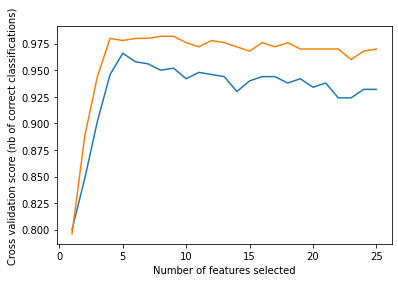

In [26]:
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000, n_features=25, n_informative=3,
                           n_redundant=2, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1, random_state=0)

# Create the RFE object and compute a cross-validated score.
rf = RandomForestClassifier(n_estimators=100)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### Should I do forward or backward search?

This is a good question, and since both algorithms are greedy they are not guaranteed to get the best model and they both will simply be approximations. Therefore if you have time you can actually run both the backward and forward search and use cross validation on the result and see if the backward or forward search is better.



#### Further reading

There are numerous heuristic ways to select features, there are also some more advanced methods that we will not go into here, but if you are interested see for instance Bayesian MAP. The simpler methods that we can cover here are heuristic and are the cheapest in terms of computational complexity, compared to forward and backward search. 

1. Correlation scoring, i.e. compute the correlation between the feature and the target variable and use that as a score. Then simply choose the top $m$ features.
2. [Mutual information scoring](https://en.wikipedia.org/wiki/Mutual_information)
3. Feature importance from models like random forest.

## Regularization

The problem of overfitting can be tackled using a technique called _regularization_. Overfitting occurs when a model has too much variance and picks up useless patterns in the data. We can prevent this by introducing more bias to the model by modifying the loss function which is done by adding a regularization term $R(f)$. If we use mean squared error with regularization our objective function to minimize would look as follows:

$$\sum_i (y_i-f(x_i))^2+\lambda R(f).$$

$\lambda$ is a parameter which controls how strong our regularization is. The higher value the more bias. The regularization term can take many forms but two of the most commonly used regularizers are 

$$\sum_i w_i^2 \quad \textrm{and} \quad \sum_i |w_i|$$

which are called Ridge and Lasso regularization respectively. These regularizers ensures that large weights will be penalized when optimizing our objective function. By doing so simpler models will be favored over more complex ones which helps to prevent overfitting. 

## Hyperparameter tuning

In the context of linear and logistic regression (see module *Supervised Learning*) we encountered the concept of parameters. Parameters are automatically learned from the data during model training, for example, by using gradient descent to find the (estimated) parameters that minimize a specific loss function.

Hyperparameters, on the other hand, are manually set and are not learned from the data. Nevertheless, hyperparameters are used to control different aspects of the model training process and may have a substantial impact on the model.

We have already seen a few hyperparameters. For example, the regularization hyperparameter $\lambda$ is a constant that is manually set to control the size of the regularization term. $\lambda$ helps control the complexity of the model: a larger value produces a simpler model, which is less prone to overfitting (but which may instead underfit).

In decision trees for classification (see module *Supervised Learning*), we discussed different methods for evaluating the best splitting point at a node, e.g. using Gini impurity or cross-entropy. It turns out that this evaluation method is also an example of a hyperparameter. Another hyperparameter in decision trees is the maximum depth of the tree. Setting the maximum depth to a smaller value will result in a simpler model that hopefully overfits less. For more examples of hyperparameters you can check out the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree#sklearn.tree.DecisionTreeClassifier) (and yes, the hyperparameters are referred to as parameters in the documentation).

In scikit-learn, the machine learning methods use default hyperparameter settings unless these are explicitly specified. Let’s say we wanted to find the optimal choice of hyperparameters for our model. How would we choose them? The answer is to perform hyperparameter tuning, which in general follows these steps:

1. Depending on the machine learning method, choose a number of values or settings to try for some of the hyperparameters, e.g. for a decision tree you could choose to test a maximum depth of 3, 4 and 5 as well as two different methods for evaluating the best splitting point, “gini” and “entropy”.
2. Decide on how you will identify which combinations of hyperparameters to try out. One option is to try all possible combinations of hyperparameter settings that were specified in step 1, this is known as [Grid Search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search). E.g., in the example from step 1, there would be six combinations to test if using Grid Search.
3. For each of the hyperparameter combinations from step 2, evaluate the performance of the model, e.g. using cross-validation.
4. Choose the hyperparameters values or settings that resulted in the best model performance.

#### Example

To illustrate hyperparameter tuning, and grid search in particular, let's return to the Cars dataset that we encountered previously.

Let's say that we would like to construct a decision tree model for this dataset to predict fuel consumption.

In [27]:
import pandas as pd
cars = pd.read_csv('../../Data/cars.csv')
cars.head(2)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,buick skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0


In [28]:
# Convert Miles per Gallon to Gallons per Mile (fuel consumption)
cars['GPM'] = 1/cars['MPG']
cars = cars.dropna()

In [29]:
# Feature variables
X = cars[['Cylinders','Weight','Year','Origin','Displacement']]
# Target variable
y = cars['GPM']

In [30]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

Suppose we want to perform a grid search to find the optimal splitting criterion and maximum depth of our decision tree for regression. We decide to try out the splitting criteria 'mse' and 'mae' as well as maximum depths $3, 4, 5$ and $6$. That is, we will search the following $8$ combinations of hyperparameter settings: $('mse', 3), ('mse', 4), ('mse', 5), ('mse', 6), ('mae', 3), ('mae', 4), ('mae', 5)$ and $('mae', 6)$.

Using the function `GridSearchCV` in scikit-learn we can perform grid search and use k-fold cross-validation to evaluate which combination of hyperparameter settings that is optimal for our particular dataset. All we need to do is specify a machine learning method (`estimator`), which part of this method's hyperparameter space (`param_grid`) that we would like to explore as well as which metric (`scoring`) to use to evaluate each model. In addition, we can optionally state how many folds to use during k-fold cross-validation; the default number of folds in scikit-learn is $5$.

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Decision tree for regression
estimator = DecisionTreeRegressor(random_state=20)
# Grid of hyperparameters to search
param_grid = {'criterion': ['mse', 'mae'],'max_depth': [3, 4, 5, 6]}
# Number of folds to use in k-fold cross-validation
cv = 5

# Set up grid search
gs = GridSearchCV(estimator=estimator,
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  cv=5)
# Note that negative mean squared error is used instead of
# mean squared error here. The reason for this is simply
# because the scoring parameter is defined such that a
# larger score is better.

# Perform grid search using the training set
gs.fit(X_train, y_train)

# Best hyperparameter settings
gs.best_params_

{'criterion': 'mse', 'max_depth': 5}

Here we find that $'mse'$ is the optimal splitting criterion and $5$ to be the optimal maximum depth of the decision tree. Note that we used the training set to perform the grid search. It is when we call the `fit` method that the grid search is performed. What also happens in this step is that the model is retrained on the entire training set using the best found hyperparameters.

Next let's evaluate the performance of this model on the test set, using the mean squared error as the metric.

In [32]:
from sklearn.metrics import mean_squared_error
mean_squared_error(gs.predict(X_test), y_test)

5.368527142049106e-05

Finally we compare this score to a decision tree in which the default settings of the hyperparameters is used.

In [33]:
estimator.fit(X_train, y_train)
mean_squared_error(estimator.predict(X_test), y_test)

5.096409944119853e-05

We see that the performance of our model improved somewhat with hyperparameter tuning.

Let's wrap up this section with some general pointers regarding hyperparameter tuning:
* It's always a good idea to try the default hyperparameter settings before embarking on hyperparameter tuning. The default settings can sometimes work surprisingly well and provide a baseline for your hyperparameter tuning efforts.
* Beware that hyperparameter tuning using grid search can be **very computationally expensive**. Let's say that you have $10$ different hyperparameters that you would like to tune and $7$ different values that you would like to evaluate for each hyperparameter. This amounts to  $282,475,249$ combinations to test. One way to navigate this issue is to be very selective in which hyperparameters that are tuned and to use larger steps between the values that are searched. Once you have an idea of what values seem suitable you can perform a second round of hyperparameter tuning by zooming in on interesting values and testing a few values in the vicinity.
* Use another less computationally expensive search strategy, such as [randomized search](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization), which may yield comparable results to grid search but at a much smaller computational cost.


# Feature Scaling

Several machine learning methods will only work well if all the features are on the same scale. To illustrate this, consider the following example where we use the Cars dataset to construct a regression model to predict the fuel consumption in gallons per mile (GPM) using the columns Displacement and Cylinders as feature variables.

In [34]:
import pandas as pd
cars = pd.read_csv('../../Data/cars.csv')

# Convert Miles per Gallon to Gallons per Mile
cars['GPM'] = 1/cars['MPG']

# Select columns to include
cols = ['Displacement', 'Cylinders', 'GPM']
cars = cars[cols]

# Drop rows with missing values
cars = cars.dropna()

Let's assume that Displacement was measured in another unit such that all values are divided by $1,000,000$:

In [35]:
cars['Displacement'] = cars['Displacement']/1e6

# Calculate summary statistics
cars.describe()

,Displacement,Cylinders,GPM
count,398.000000,398.000000,398.000000
mean,0.000193,5.454774,0.047672
std,0.000104,1.701004,0.016589
min,0.000068,3.000000,0.021459
25%,0.000104,4.000000,0.034483
50%,0.000149,4.000000,0.043478
75%,0.000262,8.000000,0.057143
max,0.000455,8.000000,0.111111


Notice how much smaller the scale is of the transformed Displacement feature compared to the Cylinders feature.

Next we split the data into training and test sets and then fit a linear regression model with L2 regularization to the training set. Note that such a model is referred to as **ridge regression** and is implemented in scikit-learn as `Ridge`. Finally, we evaluate the model performance on the test set using $R^2$ as the metric.

In [37]:
from sklearn.linear_model import Ridge

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(cars[['Displacement', 'Cylinders']],
                                                    cars['GPM'], random_state=1)

# Fit linear regression model with L2 regularization (= ridge regression)
ridge_reg = Ridge()
ridge_reg.fit(X_train,y_train)

# Evaluate model performance using R^2 as the metric
ridge_reg.score(X_test, y_test)

0.7453055691237811

Now let's see what happens when we scale the features prior to doing any modeling. We will do this using the `StandardScaler` function in `scikit-learn`.

Using standard scaling (also known as [standardization](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)), each feature is centered so that it has mean 0 (by subtracting the mean of the feature) and scaled so that it has standard deviation 1 (by dividing by the standard deviation of the feature). 

**Important:** Scaling of the features should be defined in terms of the **training** data. For example, in the case of standard scaling, the mean and standard deviation of each feature is calculated based on the training data and is then used to scale both the **training** and **test** data. The reason why the scaling of the features should be based on the training data is because it is part of the model. Had the scaling been defined in terms of the entire dataset, there could be risk of **data leakage**, where information about the test set "leaks" into the training set.

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Fit StandardScaler using training set
sc.fit(X_train)

# Scale both training and test sets
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit linear regression model
ridge_reg_scaled = Ridge()
ridge_reg_scaled.fit(X_train,y_train)

# Evaluate model performance using R^2 as the metric
ridge_reg_scaled.score(X_test, y_test)

0.8140049812338649

Scaling the features improved the performance of our model.

So why is it important to scale the features when the model includes a regularization term? Consider for a moment a regression model that is based on a single feature. If we decide to multiply this feature by a constant and then use this modified feature to construct a model, how will that impact the prediction of the model compared to if we had constructed a model using the original feature? The answer is it wouldn’t. If a feature is scaled by a constant $c$, the information contained in it remains the same, the only difference is that we must multiply the coefficient of our model by $1/c$ to obtain the same prediction as before (note that this multiplication step is learned automatically when the model is trained). Therefore, we can think of the coefficient in our regression model as converting from the unit of the feature to the unit of the target variable. This holds also when there are multiple features in the regression model, but not when the model includes a regularization term (i.e. when $\lambda$ > 0).

As was described previously, one way in which we can think of regularization is that it is like a penalty that prevents the model coefficients or parameters from becoming too large and in doing so helps to reduce the risk of the model overfitting. Note that the regularization hyperparameter $\lambda$ is independent of the unit of the feature variables. In the case when all features are on the same scale, the coefficients can be interpreted as the relative impact of each feature in the model. When the features are on different scales, however, the regularization will not be applied fairly to all features. Features with a smaller unit will result in larger coefficients in the model and will be penalized more in the regularization than features with a larger unit. This puts features having a smaller unit at a disadvantage. To place all features on an equal footing we must therefore always remember to scale the features when applying regularization to our models.

### Which models need a standard scale?

It is generally recommended to scale the data before modeling. Regularization is one example when scaling is necessary. Other common settings in which it is important to scale the features include:

* machine learning algorithms that depend on the calculation of the (Euclidean) distance between observations (features with a larger scale will dominate)
* methods that take differences in feature variance into account (features with a larger scale will dominate)
* machine learning algorithms that use gradient descent for training (scaling speeds up the convergence of gradient descent)

Listed below are some of the models that require a standard scale in order to perform well:

* Logistic Regression
* KMeans (see module *Unsupervised Learning*)
* KNearest Neighbors (see module *Models for Learning*)
* Neural Networks (see module *Models for Learning*)
* Principal Component Analysis (see module *Unsupervised Learning*)

Are there models that do not need a standard scale? Yes, e.g. models involving decision trees in general do not need a standard scale. Recall that when constructing a decision tree we want to find the best possible feature and its value to split on. This involves first sorting the values of each feature from smallest to largest and then finding the feature and splitting point combination that yields the best separation of the data (according to some metric that we have chosen e.g. Gini impurity). Since we are only considering the ordering within individual features separately, it does not matter whether the features are on different scales in decision trees models.

# Feature Encoding

All machine learning models work with numbers, but sometimes the data comes in other formats. Mostly we have measurement values and other numerical features, but sometimes we have categories. The question is: how do we feed a category to a machine learning model only accepting numbers? Well, first of all, the most common formats for categorical features are the following two:

* Categorical (text), i.e. strings describing a category
* Categorical (number), a number describing a category

The first one has a problem since we cannot give a model text, the second one has another problem. This is the fact that categories usually do not have an order.

Let us say that we are given four categories, they are: pears, bananas, apples and pineapples. Suppose we encode them as follows:

| Category | Encoding |
|----------|----------|
|  Pear    |     0    |
|  Banana  |     1    |
|  Apples  |     2    |
|Pineapple |     3    |

This infers an order on the categories. Remember for instance how a decision tree actually splits values, i.e. it does so via an inequality, therefore the splits will always be on the order of the categories. It is easy to realize that this might be a problem, especially if two categories are very similar but are far away in terms of order. Take the example of *Pear* and *Apple*, they are closer in many aspects than for instance *Pear* and *Banana*.

The question is: how do we encode categorical features such that the splits we make are reasonable and only considers the categories themselves? The answer actually depends on the number of features that you have and the model that you are trying to fit.

In [40]:
import pandas as pd
df = pd.read_csv('../../Data/iris.csv')
df.head(1)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa


Note that the above dataframe has a column called *Species* that contains the following textual categories.

In [41]:
df['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

So, there are three categories, *setosa*, *versicolor* and *virginica*. Since we have used this dataset many times before and did not have to worry about this, it is clear that we can sometimes skip encoding textual categories. When should we encode and when can we skip it? The answer is simple: sklearn recognizes when you have labels as strings and does not care about the numerical value they represent, when it comes to features as input to a model it will complain as it expects everything to be numerical. Let us make a test to highlight what we mean:

In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
try:
    # I know this is stupid we try to have the same input as output, 
    # but we hightlight a point about the type of values
    
    dtr.fit(df[['Species']],df['Species'])
except ValueError as error:
    print(error)

could not convert string to float: 'setosa'


This immediately cries for help that it could not convert string to float. Let us try the other way around, i.e. strings as labels, we know this will work since we did it earlier,

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
try:
    dtr.fit(df[['Sepal.Length']],df['Species'])
except ValueError as error:
    print(error)

As we saw earlier this works fine. Let's try encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Species'])
df['Species_num'] = le.transform(df['Species'])

In [45]:
# What le actually does is encode the categories to numbers as we described above
dict(zip(le.classes_,le.transform(le.classes_)))

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
try:
    dtr.fit(df[['Species_num']],df['Species'])
except ValueError as error:
    print(error)

That runs fine, so we can at least run our code. Let us try something fun - try a decision tree regressor to go from the categories to the features.

In [47]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
try:
    dtr.fit(df[['Species_num']],df[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']])
except ValueError as error:
    print(error)

This is not something that you would commonly do and it will essentially just learn the average of each class, but it will serve the purpose of showing encoding formats:

In [48]:
pd.DataFrame(
    dtr.predict(le.transform(le.classes_).reshape(-1,1)),
    columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']).set_index(le.classes_)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


Yay! That works fine.

## One-hot encoding

Above we went through how to actually make numbers out of strings with `LabelEncoder`. However, this only addresses one problem. The second problem of removing the artificial order of the categorical features can be done via a process called **One-hot encoding**:

This is performed as follows.

Let us say that we have $n$ input categories. Then we can construct $n$ binary features, where each feature corresponds to a binary value being 1 if the data point corresponds to that feature and 0 if not. To make it clear, assume that we wish to encode the features that we just made into numbers with one-hot encoding. Let us see what we get.

In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False,categories='auto')

# The onehot encoder accepts only numerical data so we need to apply the labelencoder that we had
# above as input

ohe.fit(le.transform(df['Species']).reshape(-1,1))

OneHotEncoder(sparse=False)

In [51]:
import numpy as np
A = ohe.transform(le.transform(le.classes_).reshape(-1,1))
pd.DataFrame(A).set_index(le.classes_)

,0,1,2
setosa,1.0,0.0,0.0
versicolor,0.0,1.0,0.0
virginica,0.0,0.0,1.0


It is now easy to see that each category gets assigned a single binary combination and the fact that for each row there is only one binary number = 1, this is called hot and thus the name **one-hot** makes more sense. It should be noted that the output of the `OneHotEncoder` is a [sparse](https://docs.scipy.org/doc/scipy/reference/sparse.html) matrix, unless specified as we did, and needs to be dealt with sometimes, but many models accept sparse data as input.

What is the benefit of having one-hot encoding you ask? When building a `DecisionTree` for instance it makes sense that an inequality split will give rise to a one-vs-rest split, something which, as pointed out above, cannot be done for enumerated labels.

## Structured labels

The problem with categorical features is that when the number of categories is large the system of **One-hot** encoded variables becomes unwieldy. In fact, it happens fairly quickly whenever you use Random forests, i.e. categorical features that have more than say 30-ish categories start to become a problem.

The problem stems from the sparsity of the problem, and results in two problems for tree-based algorithms:

1. The sparsity of one-hot encoded features essentially ensures that continuous variables will get a higher feature importance.
2. A single level of categorical variable must be a very good predictor in order to be selected early in the tree building.

If we decide to skip encoding the categories but instead consider them as integers, ignoring the error incurred by the artificial order relation, we end up with the reverse problem, i.e. that the more categories a feature contains, the more important the feature will become since the algorithm is more likely to find a split. This can be seen in for instance: 

In [55]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('http://rnowling.github.io/machine/learning/2015/08/10/random-forest-bias.html',400)

# End-to-End Example 

## Intro

We will use the [Ames Housing Price dataset](http://jse.amstat.org/v19n3/decock.pdf) (Journal of Statistics Education Volume 19, Number 3(2011)) as the basis of this chapter. The data is described as

<div class="alert alert-info">

**Description:** This paper presents a data set describing the sale of individual residential property in Ames, Iowa from 2006 to 2010. The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values.

</div>

The file can be downloaded from [amstat.org](http://jse.amstat.org/v19n3/decock/AmesHousing.txt).

We need to take care of ingesting this data, transforming, cleaning and so on. In this chapter we will take this data from start to finish, i.e. we will do ETL -> Exploration -> Modeling and finally evaluation.

<div class="alert alert-info">

**Goal:** Use the features (explanatory variables) to build a model that predicts housing prices measured as the root-mean-square deviation of the log.

</div>

What is the root-mean-square deviation of the log? What is it good for?

Since we are interested in predicting price we want our error measurement to capture relative errors, so that a cheap house that we predict wrongly with a factor of two is as bad as predicting wrongly with a factor of two for an expensive house. Otherwise we run the risk of building a model that will perform well on expensive buildings while performing badly on cheap buildings.

Remember that Mean Square Error is defined as

$$\text{MSE}=\frac{1}{n} \sum_{i=1}^n |y_i - \hat y_i|^2$$

then **RMSE** (Root Mean Square Error) is defined as

$$\text{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^n |y_i - \hat y_i|^2}$$

and the **RMSE** of the log is defined as

$$\text{RMSE-log}=\sqrt{\frac{1}{n} \sum_{i=1}^n |\log(y_i) - \log(\hat y_i)|^2}$$

It might seem unclear why **RMSE-log** actually measures relative error, but remember from the rules of the logarithm that

$$\log(y_i) - \log(\hat y_i) = \log\bigg(\frac{y_i}{\hat y_i}\bigg )$$

which is zero if they have the same size. It might worry you that this metric penalizes differently when $\frac{y_i}{\hat y_i} < 1$ vs $\frac{y_i}{\hat y_i} > 1$, but due to the same rule for logarithms we see that

$$\log\bigg(\frac{y_i}{\hat y_i}\bigg ) = -\log\bigg(\frac{\hat y_i}{y_i}\bigg ).$$

## ETL (Extract Transform Load)

In [57]:
import pandas as pd

In [59]:
df = pd.read_csv('../../Data/HousingPrices/AmesHousing.txt',sep='\t')

Let us check how many columns we have.

In [60]:
len(df.columns)

82

In [61]:
# Number of rows
len(df)

2930

Let us display the first 10 columns.

In [62]:
df.iloc[:,:10].head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl


First problem is that many column names have spaces in them. This can cause problems, so let us remove them.

In [63]:
space_remover_dict = dict(zip(df.columns,[name.replace(' ','') for name in df.columns]))

In [64]:
df = df.rename(space_remover_dict,axis=1)

In [65]:
df.iloc[:,:10].head(10)

,Order,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl


As we can see, we have many features that are numeric, while others are strings. To get a good sense of the numerical variables we can call the describe function on the dataframe.

In [66]:
df.iloc[:,:30].describe()

,Order,PID,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemod/Add,MasVnrArea
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


As we can see when observing the count line, is that most of the numerical values are present, while however the LotFrontage seems to be missing around 200 items, but also GarageYrBlt. So we need to explore these two further, let's start with LotFrontage.

In [67]:
df['LotFrontage'][:10]

0    141.0
1     80.0
2     81.0
3     93.0
4     74.0
5     78.0
6     41.0
7     43.0
8     39.0
9     60.0
Name: LotFrontage, dtype: float64

### Dataset description

Below is a description of the columns involved

* **SalePrice:** the property's sale price in dollars. This is the target variable that you're trying to predict.
* **MSSubClass:** The building class
* **MSZoning:** The general zoning classification
* **LotFrontage:** Linear feet of street connected to property
* **LotArea:** Lot size in square feet
* **Street:** Type of road access
* **Alley:** Type of alley access
* **LotShape:** General shape of property
* **LandContour:** Flatness of the property
* **Utilities:** Type of utilities available
* **LotConfig:** Lot configuration
* **LandSlope:** Slope of property
* **Neighborhood:** Physical locations within Ames city limits
* **Condition1:** Proximity to main road or railroad
* **Condition2:** Proximity to main road or railroad (if a second is present)
* **BldgType:** Type of dwelling
* **HouseStyle:** Style of dwelling
* **OverallQual:** Overall material and finish quality
* **OverallCond:** Overall condition rating
* **YearBuilt:** Original construction date
* **YearRemodAdd:** Remodel date
* **RoofStyle:** Type of roof
* **RoofMatl:** Roof material
* **Exterior1st:** Exterior covering on house
* **Exterior2nd:** Exterior covering on house (if more than one material)
* **MasVnrType:** Masonry veneer type
* **MasVnrArea:** Masonry veneer area in square feet
* **ExterQual:** Exterior material quality
* **ExterCond:** Present condition of the material on the exterior
* **Foundation:** Type of foundation
* **BsmtQual:** Height of the basement
* **BsmtCond:** General condition of the basement
* **BsmtExposure:** Walkout or garden level basement walls
* **BsmtFinType1:** Quality of basement finished area
* **BsmtFinSF1:** Type 1 finished square feet
* **BsmtFinType2:** Quality of second finished area (if present)
* **BsmtFinSF2:** Type 2 finished square feet
* **BsmtUnfSF:** Unfinished square feet of basement area
* **TotalBsmtSF:** Total square feet of basement area
* **Heating:** Type of heating
* **HeatingQC:** Heating quality and condition
* **CentralAir:** Central air conditioning
* **Electrical:** Electrical system
* **1stFlrSF:** First Floor square feet
* **2ndFlrSF:** Second floor square feet
* **LowQualFinSF:** Low quality finished square feet (all floors)
* **GrLivArea:** Above grade (ground) living area square feet
* **BsmtFullBath:** Basement full bathrooms
* **BsmtHalfBath:** Basement half bathrooms
* **FullBath:** Full bathrooms above grade
* **HalfBath:** Half baths above grade
* **Bedroom:** Number of bedrooms above basement level
* **Kitchen:** Number of kitchens
* **KitchenQual:** Kitchen quality
* **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
* **Functional:** Home functionality rating
* **Fireplaces:** Number of fireplaces
* **FireplaceQu:** Fireplace quality
* **GarageType:** Garage location
* **GarageYrBlt:** Year garage was built
* **GarageFinish:** Interior finish of the garage
* **GarageCars:** Size of garage in car capacity
* **GarageArea:** Size of garage in square feet
* **GarageQual:** Garage quality
* **GarageCond:** Garage condition
* **PavedDrive:** Paved driveway
* **WoodDeckSF:** Wood deck area in square feet
* **OpenPorchSF:** Open porch area in square feet
* **EnclosedPorch:** Enclosed porch area in square feet
* **3SsnPorch:** Three season porch area in square feet
* **ScreenPorch:** Screen porch area in square feet
* **PoolArea:** Pool area in square feet
* **PoolQC:** Pool quality
* **Fence:** Fence quality
* **MiscFeature:** Miscellaneous feature not covered in other categories
* **MiscVal:** $Value of miscellaneous feature
* **MoSold:** Month Sold
* **YrSold:** Year Sold
* **SaleType:** Type of sale
* **SaleCondition:** Condition of sale

As we can see, the LotFrontage is the linear stretch of road in front of building. Some of those values, as we discovered above, are NaN. Let us make the choice of interpreting this as there being 0 feet of road in front of building.

Looking at GarageYrBlt which says which year the garage was built is conditional on whether the garage exists or not, and is probably signified by GarageType being NaN. Therefore we simply replace NaN values with 0 and encode the GarageType NaN as No Garage.

Let us now consider the categorical features, we can list them as follows. Interestingly, text is stored in a Pandas Dataframe as type Object.

In [68]:
categorical_cols = []
numerical_cols = []
for column in df.columns:
    if (df[column].dtype == 'O'):
        print(column, end=', ')
        print(df[column].unique())
        
        categorical_cols.append(column)
    else:
        numerical_cols.append(column)

MSZoning, ['RL' 'RH' 'FV' 'RM' 'C (all)' 'I (all)' 'A (agr)']
Street, ['Pave' 'Grvl']
Alley, [nan 'Pave' 'Grvl']
LotShape, ['IR1' 'Reg' 'IR2' 'IR3']
LandContour, ['Lvl' 'HLS' 'Bnk' 'Low']
Utilities, ['AllPub' 'NoSewr' 'NoSeWa']
LotConfig, ['Corner' 'Inside' 'CulDSac' 'FR2' 'FR3']
LandSlope, ['Gtl' 'Mod' 'Sev']
Neighborhood, ['NAmes' 'Gilbert' 'StoneBr' 'NWAmes' 'Somerst' 'BrDale' 'NPkVill'
 'NridgHt' 'Blmngtn' 'NoRidge' 'SawyerW' 'Sawyer' 'Greens' 'BrkSide'
 'OldTown' 'IDOTRR' 'ClearCr' 'SWISU' 'Edwards' 'CollgCr' 'Crawfor'
 'Blueste' 'Mitchel' 'Timber' 'MeadowV' 'Veenker' 'GrnHill' 'Landmrk']
Condition1, ['Norm' 'Feedr' 'PosN' 'RRNe' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn']
Condition2, ['Norm' 'Feedr' 'PosA' 'PosN' 'Artery' 'RRNn' 'RRAe' 'RRAn']
BldgType, ['1Fam' 'TwnhsE' 'Twnhs' 'Duplex' '2fmCon']
HouseStyle, ['1Story' '2Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '1.5Unf' '2.5Fin']
RoofStyle, ['Hip' 'Gable' 'Mansard' 'Gambrel' 'Shed' 'Flat']
RoofMatl, ['CompShg' 'WdShake' 'Tar&Grv' 'WdShn

When categorical features are labeled as NaN, it is usually a good idea to code that as a separate category. Let us check which categories contain NaN values.

In [69]:
for cat in categorical_cols:
    if ((df[cat].isna()).sum() > 0):
        print(cat)

Alley
MasVnrType
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


Checking the dataset description we get that

Category     | Nan meaning
-------------|-----------------
Alley        | No alley access
MasVnrType   | None
BsmtQual     | No Basement
BsmtCond     | No Basement
BsmtExposure | No Basement
BsmtFinType1 | No Basement
BsmtFinType2 | No Basement
Electrical   | Unknown
FireplaceQu  | No Fireplace
GarageType   | No Garage
GarageFinish | No Garage
GarageQual   | No Garage
GarageCond   | No Garage
PoolQC       | No Pool
Fence        | No Fence
MiscFeature  | None

So it seems reasonable that we can just replace all NaNs with a new value, since they carry a meaning in themselves. However, notice that some categorical variables are actually numerical in disguise. For instance, the Quality variables are actually ordered. We need to take care of these.

* LandSlope: Slope of property
* ExterQual: Evaluates the quality of the material on the exterior 
* ExterCond: Evaluates the present condition of the material on the exterior
* BsmtQual: Evaluates the height of the basement
* BsmtCond: Evaluates the general condition of the basement
* BsmtExposure: Refers to walkout or garden level walls
* BsmtFinType1: Rating of basement finished area
* BsmtFinType2: Rating of basement finished area (if multiple types)
* HeatingQC: Heating quality and condition
* KitchenQual: Kitchen quality
* Functional: Home functionality (Assume typical unless deductions are warranted)
* FireplaceQu: Fireplace quality
* GarageFinish: Interior finish of the garage
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* PoolQC: Pool quality
* Fence: Fence quality

In [70]:
hidden_categories = ['LandSlope','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence']

In [71]:
for cat in hidden_categories:
    print(cat,end=', ')
    print(df[cat].unique())

LandSlope, ['Gtl' 'Mod' 'Sev']
ExterQual, ['TA' 'Gd' 'Ex' 'Fa']
ExterCond, ['TA' 'Gd' 'Fa' 'Po' 'Ex']
BsmtQual, ['TA' 'Gd' 'Ex' nan 'Fa' 'Po']
BsmtCond, ['Gd' 'TA' nan 'Po' 'Fa' 'Ex']
BsmtExposure, ['Gd' 'No' 'Mn' 'Av' nan]
BsmtFinType1, ['BLQ' 'Rec' 'ALQ' 'GLQ' 'Unf' 'LwQ' nan]
BsmtFinType2, ['Unf' 'LwQ' 'BLQ' 'Rec' nan 'GLQ' 'ALQ']
HeatingQC, ['Fa' 'TA' 'Ex' 'Gd' 'Po']
KitchenQual, ['TA' 'Gd' 'Ex' 'Fa' 'Po']
Functional, ['Typ' 'Mod' 'Min1' 'Min2' 'Maj1' 'Maj2' 'Sev' 'Sal']
FireplaceQu, ['Gd' nan 'TA' 'Po' 'Ex' 'Fa']
GarageFinish, ['Fin' 'Unf' 'RFn' nan]
GarageQual, ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
GarageCond, ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
PavedDrive, ['P' 'Y' 'N']
PoolQC, [nan 'Ex' 'Gd' 'TA' 'Fa']
Fence, [nan 'MnPrv' 'GdPrv' 'GdWo' 'MnWw']


Many of these contain the following gradings 'TA' 'Fa' 'Gd' nan 'Ex' 'Po', which we can rewrite as:

Grading    |   Meaning        | Numerical representation
-----------|------------------|-------------------------
Ex         | Excellent        | 5
Gd         | Good             | 4
TA         | Typical/Average  | 3
Fa         | Fair             | 2
Po         | Poor             | 1
NA         | None             | 0

To solve this we create a dictionary that translates between the grading and the numerical representation.

In [72]:
grading_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}

In [73]:
grading_cats = ['ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']


In [74]:
for cat in grading_cats:
    df[cat] = df[cat].apply(lambda x : grading_dict.get(x,x))

In [75]:
set(hidden_categories) - set(grading_cats)

{'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Fence',
 'Functional',
 'GarageFinish',
 'LandSlope',
 'PavedDrive'}

We now do the same for the other categories:

In [76]:
slope_dict = {'Gtl':0, 'Mod': 1, 'Sev':2}
bsmt_fin_type_dict = {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2}
functional_dict = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
garage_finish_dict = {'Fin':3, 'RFn':2, 'Unf':1}
paved_drive_dict = {'Y':3, 'P': 2, 'N':1}
fence_dict = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}
basement_exposure_dict = {'Gd':4,'Av':3, 'Mn':2, 'No':1}
                    

In [77]:
df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x : basement_exposure_dict.get(x,x))
df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x : bsmt_fin_type_dict.get(x,x))
df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x : bsmt_fin_type_dict.get(x,x))
df['Fence'] = df['Fence'].apply(lambda x : fence_dict.get(x,x))
df['Functional'] = df['Functional'].apply(lambda x : functional_dict.get(x,x))
df['GarageFinish'] = df['GarageFinish'].apply(lambda x : garage_finish_dict.get(x,x))
df['LandSlope'] = df['LandSlope'].apply(lambda x : slope_dict.get(x,x))
df['PavedDrive'] = df['PavedDrive'].apply(lambda x : paved_drive_dict.get(x,x))

Now that we have taken care of these categorical features we need to perform a feature encoding on the true categorical columns.

In [78]:
true_categorical_cols = list(set(categorical_cols) - set(hidden_categories))
true_categorical_cols

['Alley',
 'SaleCondition',
 'RoofStyle',
 'Street',
 'LandContour',
 'MSZoning',
 'Heating',
 'Neighborhood',
 'MasVnrType',
 'Utilities',
 'CentralAir',
 'Condition2',
 'BldgType',
 'Condition1',
 'RoofMatl',
 'SaleType',
 'Exterior2nd',
 'LotConfig',
 'LotShape',
 'GarageType',
 'Exterior1st',
 'HouseStyle',
 'Electrical',
 'Foundation',
 'MiscFeature']

### Pandas get_dummies

This is by far the best way to do one-hot encoding or even dummy encoding of features in a dataframe in such a way that we easily can get which one-hot encoded column goes where.

In [79]:
df_encoded = pd.get_dummies(df,columns=true_categorical_cols,dummy_na=True).fillna(0)

In [80]:
true_numerical_cols = list(set(df.columns) - set(true_categorical_cols))

In [81]:
labels = list((set(true_numerical_cols) - set(['Id','SalePrice'])).union(set(true_categorical_cols)))
target = 'SalePrice'

In [82]:
df_encoded.iloc[:,:10].head(10)

,Order,PID,MSSubClass,LotFrontage,LotArea,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemod/Add
0,1,526301100,20,141.0,31770,0,6,5,1960,1960
1,2,526350040,20,80.0,11622,0,5,6,1961,1961
2,3,526351010,20,81.0,14267,0,6,6,1958,1958
3,4,526353030,20,93.0,11160,0,7,5,1968,1968
4,5,527105010,60,74.0,13830,0,5,5,1997,1998
5,6,527105030,60,78.0,9978,0,6,6,1998,1998
6,7,527127150,120,41.0,4920,0,8,5,2001,2001
7,8,527145080,120,43.0,5005,0,8,5,1992,1992
8,9,527146030,120,39.0,5389,0,8,5,1995,1996
9,10,527162130,60,60.0,7500,0,7,5,1999,1999


### Preparing a pipeline for new data

Here we gather all the transformations and choices that we made above into succinct code, this can now be used to load new data also.

In [83]:
import pandas as pd

df = pd.read_csv('../../Data/HousingPrices/AmesHousing.txt',sep='\t')

In [84]:
# Dictionaries

def prepare_data(df, test=True):
    
    space_remover_dict = dict(zip(df.columns,[name.replace(' ','') for name in df.columns]))
    df = df.rename(space_remover_dict,axis=1)

    grading_dict = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}
    slope_dict = {'Gtl':0, 'Mod': 1, 'Sev':2}
    bsmt_fin_type_dict = {'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'LwQ':2}
    functional_dict = {'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3, 'Sev':2, 'Sal':1}
    garage_finish_dict = {'Fin':3, 'RFn':2, 'Unf':1}
    paved_drive_dict = {'Y':3, 'P': 2, 'N':1}
    fence_dict = {'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1}
    basement_exposure_dict = {'Gd':4,'Av':3, 'Mn':2, 'No':1}

    df['BsmtExposure'] = df['BsmtExposure'].apply(lambda x : basement_exposure_dict.get(x,x))
    df['BsmtFinType1'] = df['BsmtFinType1'].apply(lambda x : bsmt_fin_type_dict.get(x,x))
    df['BsmtFinType2'] = df['BsmtFinType2'].apply(lambda x : bsmt_fin_type_dict.get(x,x))
    df['Fence'] = df['Fence'].apply(lambda x : fence_dict.get(x,x))
    df['Functional'] = df['Functional'].apply(lambda x : functional_dict.get(x,x))
    df['GarageFinish'] = df['GarageFinish'].apply(lambda x : garage_finish_dict.get(x,x))
    df['LandSlope'] = df['LandSlope'].apply(lambda x : slope_dict.get(x,x))
    df['PavedDrive'] = df['PavedDrive'].apply(lambda x : paved_drive_dict.get(x,x))

    grading_cats = ['ExterQual','ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual','FireplaceQu','GarageQual','GarageCond','PoolQC']

    for cat in grading_cats:
        df[cat] = df[cat].apply(lambda x : grading_dict.get(x,x))
        
    true_categorical_cols = ['MSSubClass','SaleCondition','RoofMatl','BldgType','RoofStyle','LotShape','LandContour','HouseStyle','Condition1','MiscFeature','Exterior1st','CentralAir','Exterior2nd','Alley','Foundation','Electrical','Street','Utilities','MasVnrType','MSZoning','Heating','LotConfig','SaleType','Neighborhood','GarageType','Condition2']    
    true_numerical_cols = ['ExterQual','HalfBath','BsmtUnfSF','YearRemod/Add','OverallQual','YearBuilt','LowQualFinSF','Fireplaces','KitchenQual','1stFlrSF','OverallCond','ExterCond','OpenPorchSF','BsmtFinSF2','PavedDrive','BsmtExposure','LotArea','LotFrontage','2ndFlrSF','BsmtQual','GarageCond','EnclosedPorch','3SsnPorch','WoodDeckSF','BsmtHalfBath','GarageQual','GarageFinish','YrSold','GarageArea','BsmtFullBath','FireplaceQu','GarageYrBlt','ScreenPorch','LandSlope','MasVnrArea','HeatingQC','MiscVal','KitchenAbvGr','Fence','MoSold','BsmtFinType1','BsmtFinSF1','GrLivArea','GarageCars','TotRmsAbvGrd','BsmtCond','PoolArea','PoolQC','FullBath','BsmtFinType2','TotalBsmtSF','Functional','BedroomAbvGr']
    
    labels = true_numerical_cols + true_categorical_cols
    target = 'SalePrice'
    
    df_encoded = pd.get_dummies(df[labels],columns=true_categorical_cols,dummy_na=True).fillna(0)
    if (test):
        return df_encoded, df[target], true_numerical_cols
    else:
        return df_encoded

In [85]:
X,y, num_cats = prepare_data(df)

## Exploration (knowing your data)

One aspect of the data that we can explore is to do a scatterplot between the feature and the label for the numerical categories.

In [86]:
%matplotlib inline

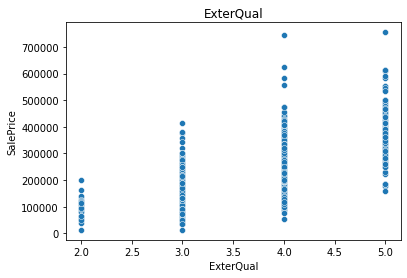

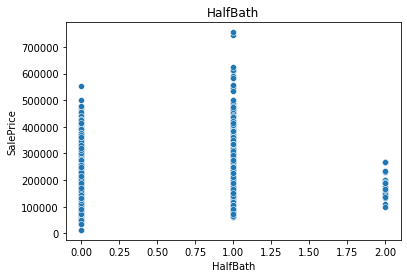

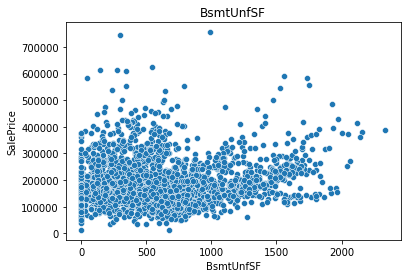

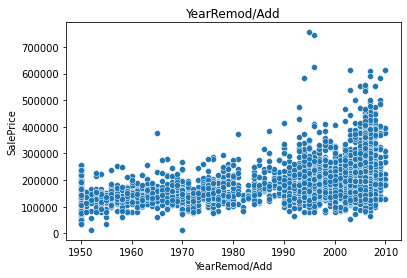

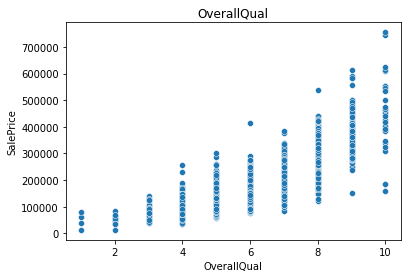

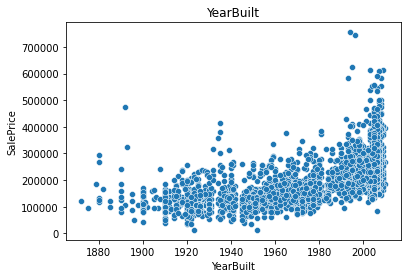

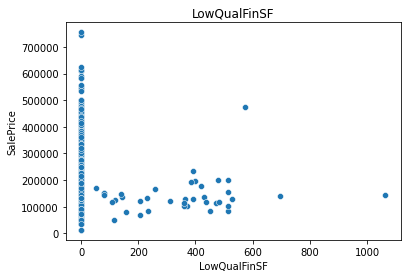

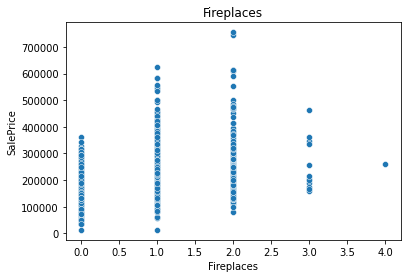

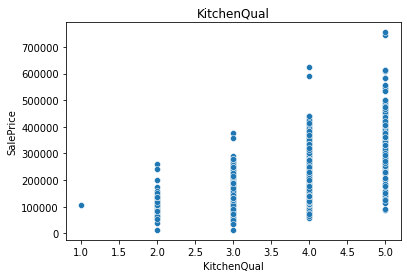

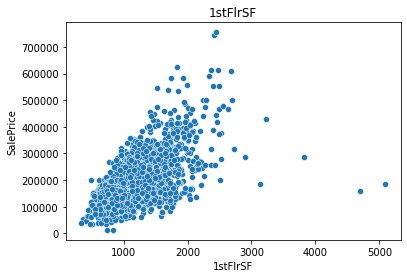

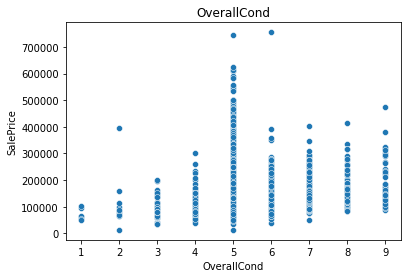

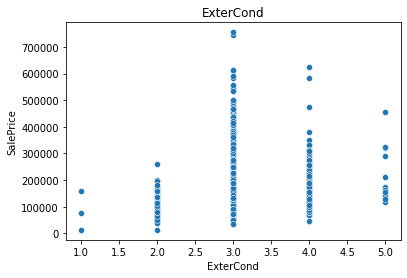

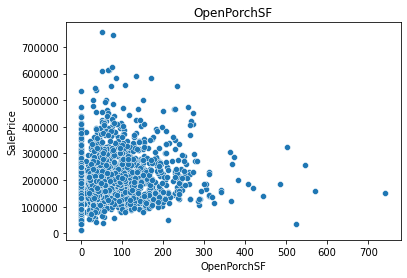

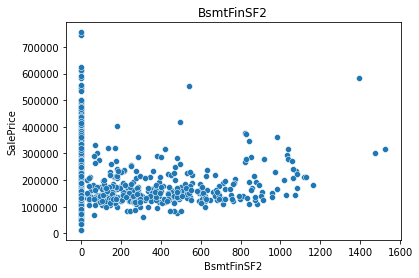

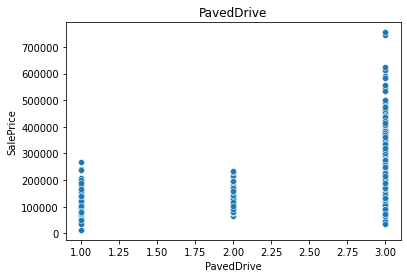

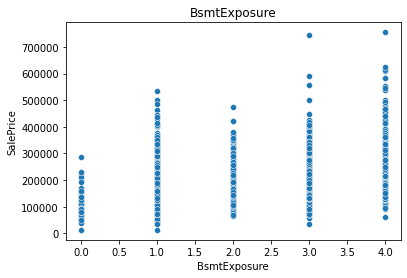

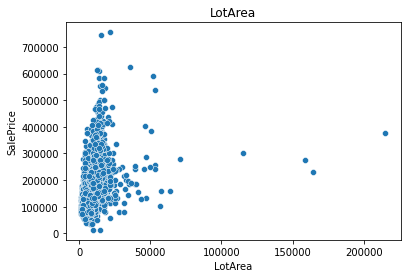

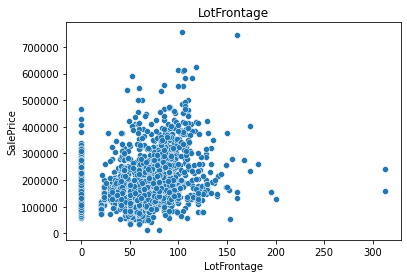

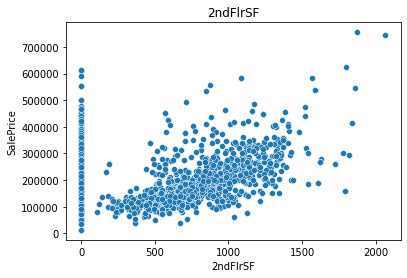

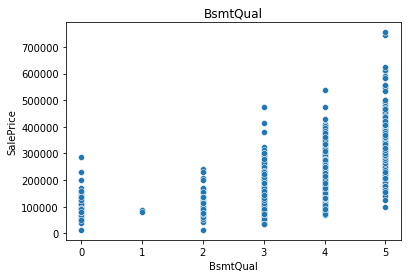

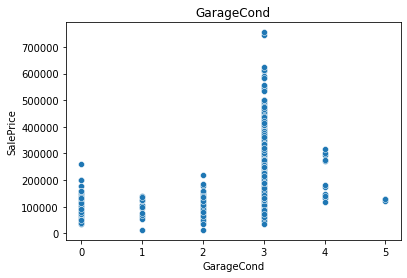

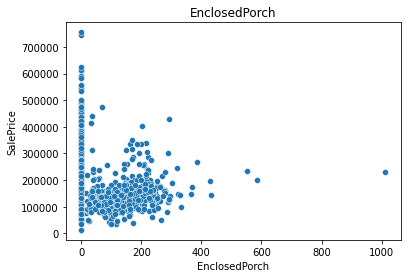

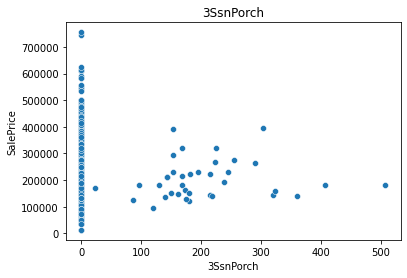

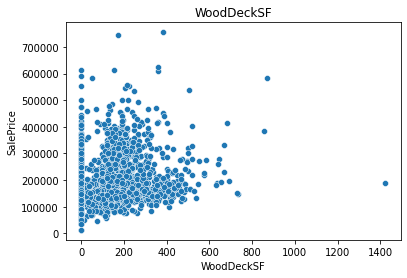

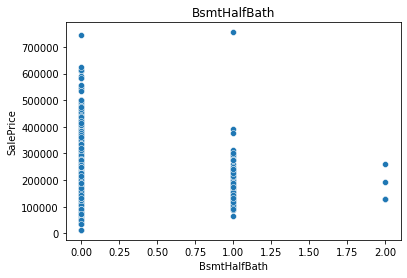

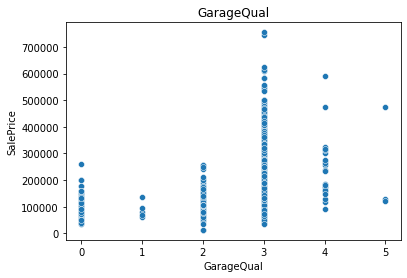

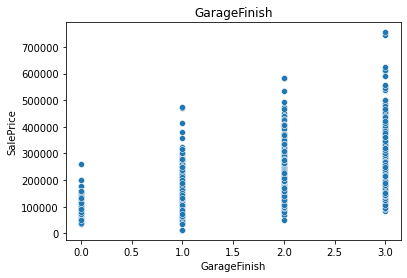

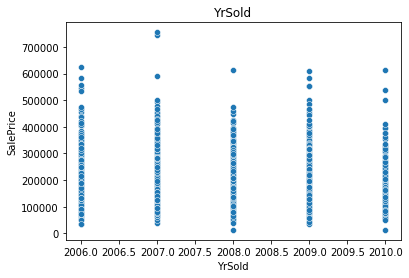

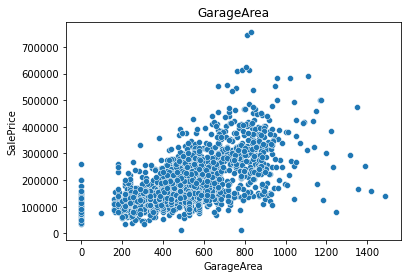

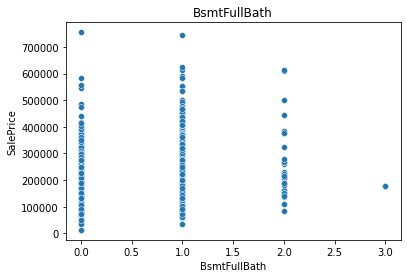

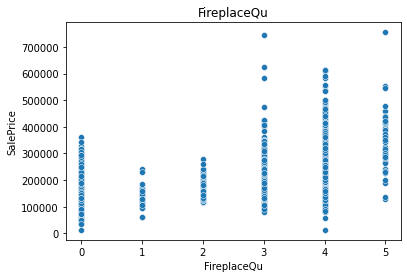

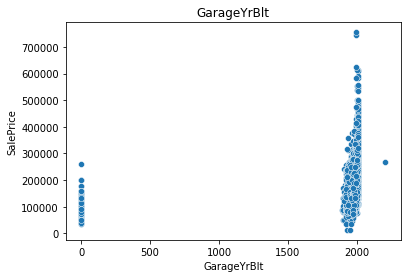

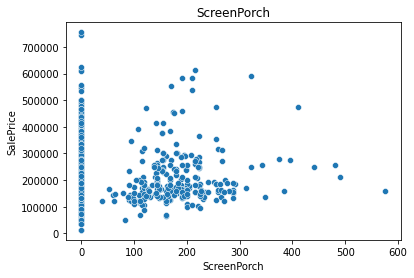

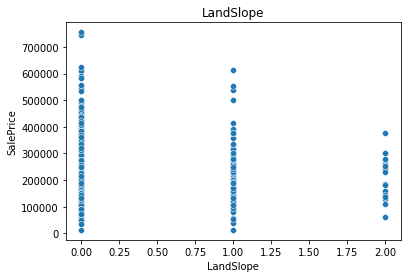

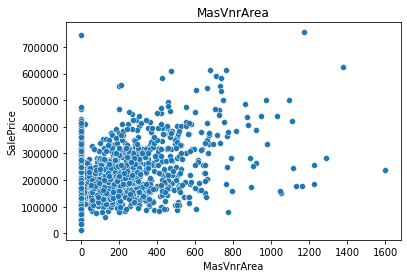

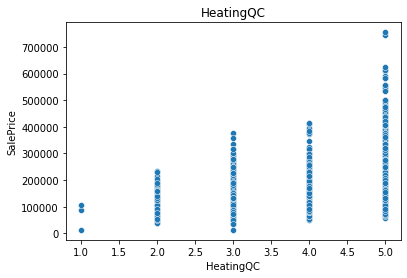

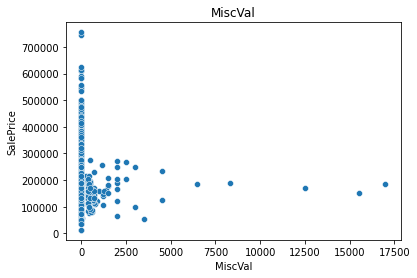

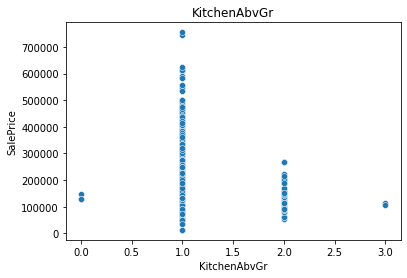

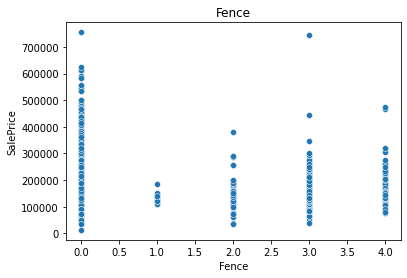

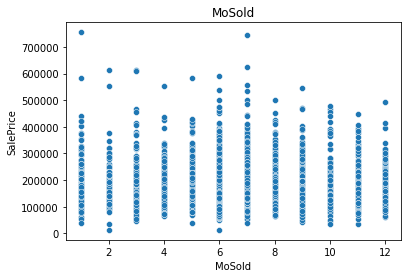

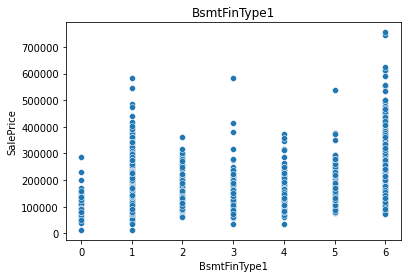

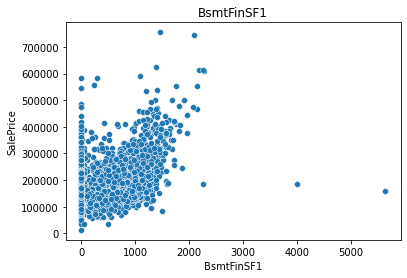

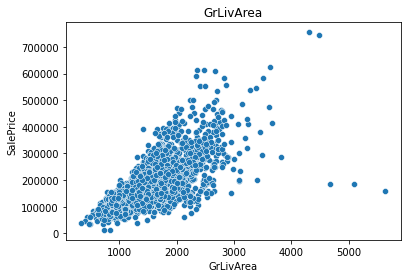

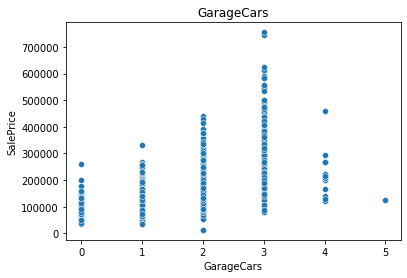

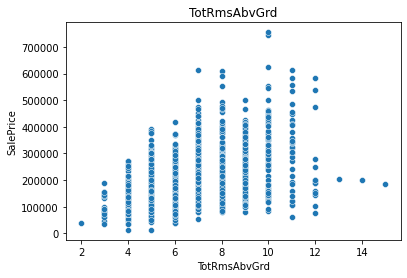

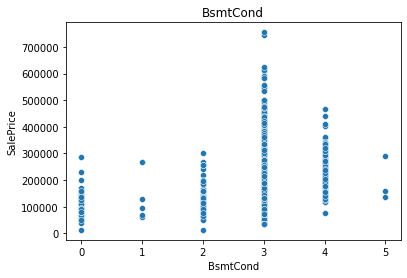

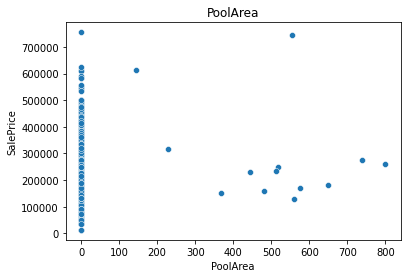

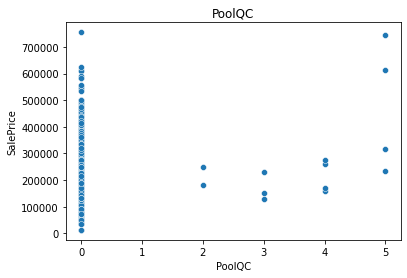

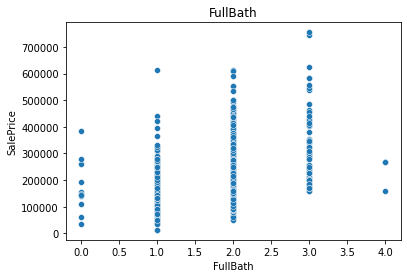

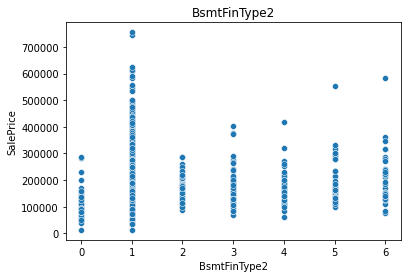

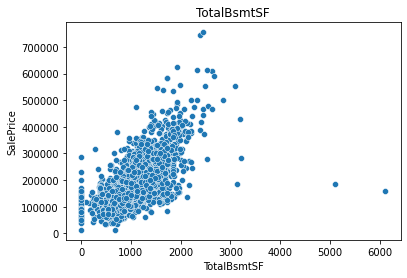

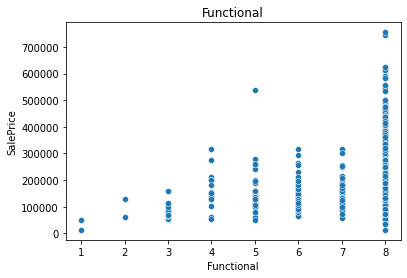

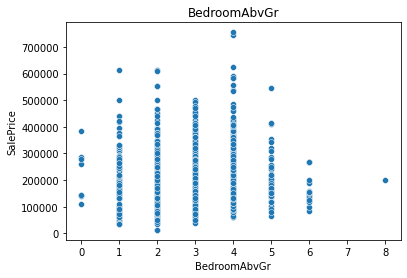

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
for cat in num_cats:
    sns.scatterplot(x=X[cat], y=y)
    plt.gca().set_title(cat)
    plt.show()

There are some simple conclusions that can be drawn from this data:

* The following features seem to be positively correlated with price: ExterQual, BsmtUnfSF, YearRemodAdd, OverallQual, YearBuilt, KitchenQual, 1stFlrSF, OverallCond, ExterCond, PavedDrive, BsmtExposure, LotArea, LotFrontage, 2ndFlrSF, BsmtQual, WoodDeckSF, GarageFinish, GarageArea, FirePlaceQu, MaxVnrArea, HeatingQC
* The following feature seems to be negatively correlated with price: BsmtHalfBath

### Heatmap exploration

A common way to explore your dataset is to look at a heatmap of the features. What this heatmap represents is the correlations between the features on the x-axis with the features on the y-axis. The heatmap just plots an image, so we need to first actually compute the correlations. This we can do by calling the `corr()` method that is included in Pandas. The correlation matrix is then fed into `seaborns` `heatmap()` function. Keep in mind that it makes most sense to consider the correlation between numerical features.

In [88]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y.values,test_size=0.3,random_state=1)
df_train = X_train.copy()
df_train.insert(len(X_train.columns),'SalesPrice',y_train)

<AxesSubplot:>

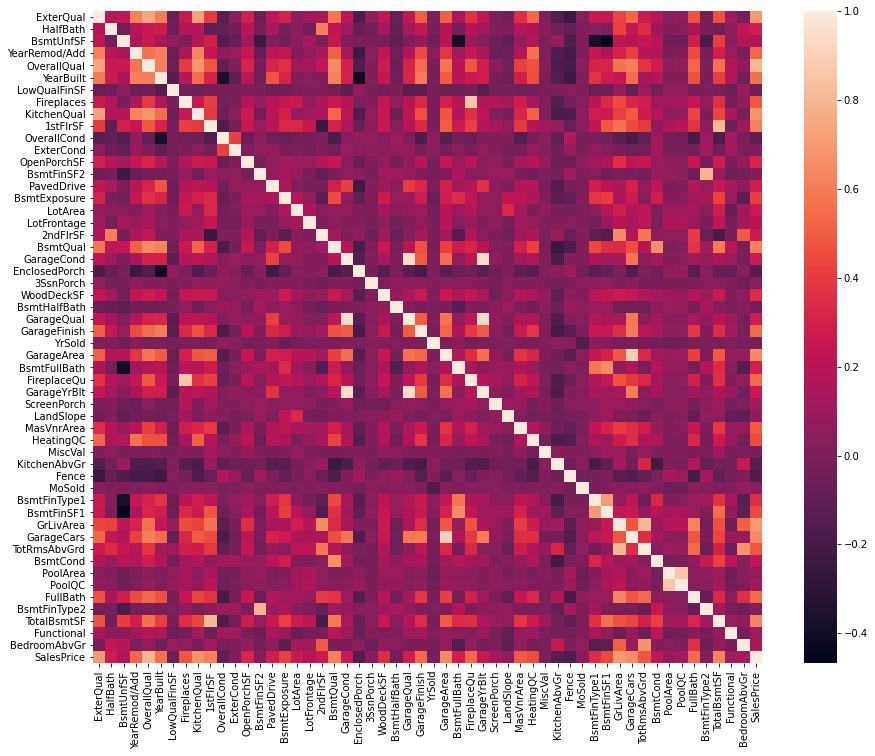

In [89]:
plt.figure(figsize=(15,12))
cols = num_cats + ['SalesPrice']
X_t_corr = df_train[cols].corr()
sns.heatmap(X_t_corr)

Above we can see the correlation plot of all the numerical features, where we have also added the output 'SalesPrice' to see correlation with the output variable. There are some obvious bright spots, for instance

* GarageQual <-> GarageCond <-> GarageYrBlt
* GarageCars <-> GarageArea
* FireplaceQu <-> Fireplaces
* TotalBsmtSF <-> 1stFlrSF
* TotalRmsAbvGrd <-> GrLivArea

We can produce a scatterplot for each of these correlations in order to explore them further.

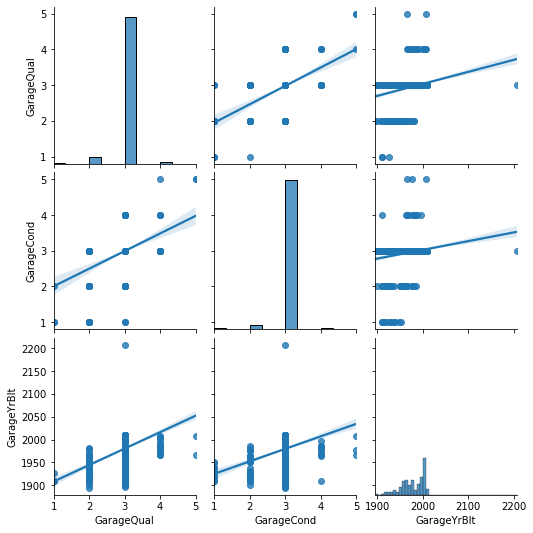

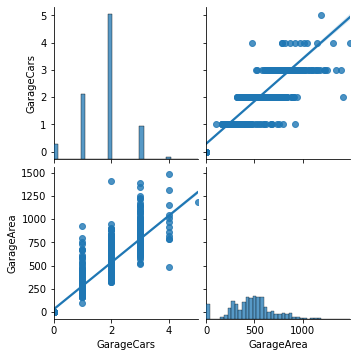

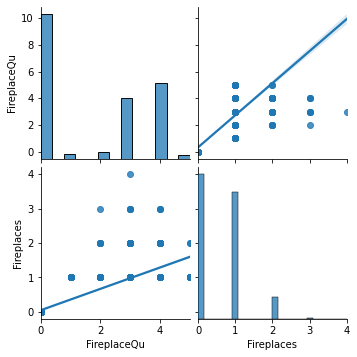

In [90]:
gqual = ['GarageQual','GarageCond','GarageYrBlt']
gcar = ['GarageCars', 'GarageArea']
fire = ['FireplaceQu','Fireplaces']

#Note that GarageYrBlt does not have a natural value when GarageCond = GarageQual = 0, 
#therefore it doesn't make sense to include it in a visual plot.
sns.pairplot(X_train[X_train['GarageYrBlt'] != 0],vars=gqual,kind='reg')
sns.pairplot(X_train,vars=gcar,kind='reg')
sns.pairplot(X_train,vars=fire,kind='reg')

The above plots are interesting, for instance the correlation between garage quality and condition. The causal connection quality -> condition should go in this direction and not the other way around. Furthermore the causal connection between year built -> quality is also clear. The connection between fireplace quality and quantity is interesting, but it is hard to figure out which direction causation has, while for the number of cars and area of garage it is very clear.

## Modeling

We are ready to model the data.  We can use a bunch of different regressors for this problem, but we will start with `LinearRegression`.  In general it is advisable to start with a simple model and investigate how far that takes you.

In [91]:
X,y, num_cats = prepare_data(df,test=True)

### Train test CV split
We will do a 60-20-20 split of the data.

In [92]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.2/0.8,random_state=1)

### Modeling considerations with our metric

Remember from the Intro that we should use the RMSE-log metric to measure our model's performance. Often one uses the very metric that we wish to measure our model's performance as the one we optimize over, thus we need to tell our regression model which metric to optimize over. Depending on the model that you decide to use this is done differently. However, for our purpose we will take another route and it is the following: if we transform the target variable with the logarithm and then regress, then RMSE for this regression model will be RMSE-log for the exponentiation of our model. To be precise we will do the following:

We want to find $f(x)$ such that $f(x) \approx y$ for data points $(x_i,y_i)$ that is in our dataset, where we will measure

$$\text{RMSE-log}=\sqrt{\frac{1}{n} \sum_{i=1}^n |\log(y_i) - \log(f(x_i))|^2}.$$

However, if we instead try to find another function $g(x) \approx \log(y)$, for data points $(x_i,y_i)$ that is in our dataset, where we will measure

$$\text{RMSE}=\sqrt{\frac{1}{n} \sum_{i=1}^n |\log(y_i) - g(x_i)|^2},$$

then for $f(x) = \exp(g(x))$ we are actually measuring

$$\text{RMSE-log}=\sqrt{\frac{1}{n} \sum_{i=1}^n |\log(y_i) - \log(f(x_i))|^2}$$

and $f(x) \approx y$.

This might seem technical but all you have to do is to regress against `np.log(y)`.

### Modeling with full feature set

We will here set up a pipeline which is a very convenient tool in scikit-learn for stacking multiple steps.

In [93]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

lr_pipe = make_pipeline(StandardScaler(),LinearRegression())
lr_pipe.fit(X_train.values,np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [94]:
np.sqrt(np.mean((np.log(y_train)-lr_pipe.predict(X_train.values))**2))

0.09930311721628794

In [95]:
np.sqrt(np.mean((np.log(y_cv)-lr_pipe.predict(X_cv.values))**2))

15715070177.434595

The training and CV error are very different.  This is typically a sign of overfitting to the training data.  We have previously introduced different techniques for handling such a problem.
### Regularization
Here we try L2 (Ridge) regularization.

In [96]:
from sklearn.linear_model import Ridge

ridge = make_pipeline(StandardScaler(),Ridge())
ridge.fit(X_train.values,np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [41]:
np.sqrt(np.mean((np.log(y_train)-ridge.predict(X_train.values))**2))

0.09930324022445179

In [42]:
np.sqrt(np.mean((np.log(y_cv)-ridge.predict(X_cv.values))**2))

0.13135302148864128

This is much better!  Train and CV error are of the same order.  However, we did not try to fine-tune the regularization parameter, so let's do that.

In [97]:
from sklearn.linear_model import RidgeCV

sc = StandardScaler()
alphas = [1e-1, 1, 10, 50, 100, 175, 250, 325, 500, 750, 1000, 2000, 3000]
ridge_cv = RidgeCV(alphas=alphas,  store_cv_values=True)
ridge_cv.fit(sc.fit_transform(X_train.astype(float)), np.log(y_train))
best_alpha = ridge_cv.alpha_
best_alpha

500.0

We find the smallest score for $\alpha=500$. To make sure that this is indeed a minimum we can plot the score against the value of $\alpha$.

Text(0.5, 0, '$\\alpha$')

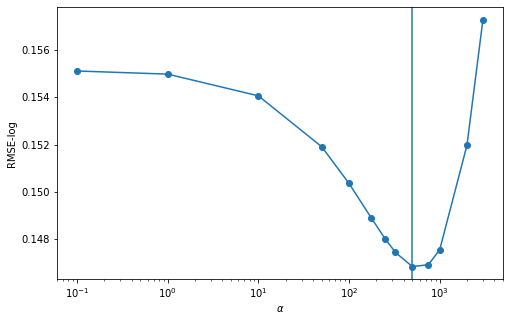

In [98]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.plot(alphas,np.sqrt(np.mean(ridge_cv.cv_values_,axis=0)),'o-')
ax.axvline(best_alpha)
ax.set_xscale('log')
ax.set_ylabel('RMSE-log')
ax.set_xlabel(r'$\alpha$')

We could fine-tune it even more, but there does not seem to be much to gain in terms of better performance of the model.  Let us evaluate the score for the CV set with the best value of the regularization parameter.

In [99]:
ridge = make_pipeline(StandardScaler(),Ridge(alpha=best_alpha))
ridge.fit(X_train.values,np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=500.0))])

In [100]:
np.sqrt(np.mean((np.log(y_train)-ridge.predict(X_train.values))**2))

0.10829246649856912

In [101]:
np.sqrt(np.mean((np.log(y_cv)-ridge.predict(X_cv.values))**2))

0.11615985528965049

### Forward feature search
We have also seen that we can use feature selection for handling an overfitting problem.  Here we will try forward feature search.

In [102]:
!pip install mlxtend

<div class="alert alert-info">

**WARNING:** The code below can take a while to run

</div>

In [103]:
from mlxtend.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

lr = LinearRegression()
sfs = SequentialFeatureSelector(lr, k_features=50, forward=True, floating=False, verbose=0, cv=KFold(5), n_jobs=-1)

sfs.fit(X_train, np.log(y_train))

SequentialFeatureSelector(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                          estimator=LinearRegression(), k_features=50,
                          n_jobs=-1)

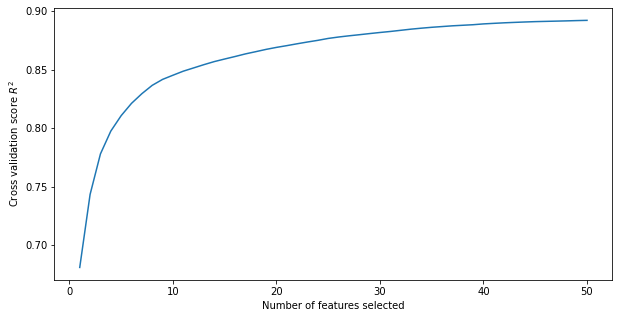

In [50]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score $R^2$")
plt.plot([subset for subset in sfs.subsets_], [sfs.subsets_[subset]['avg_score'] for subset in sfs.subsets_])
plt.show()

#### Saving the sfs features
It seems that it is enough to use $16$ features to get a reasonably good model. Let us save the names of those features in a file

In [104]:
sfs.subsets_[16]

{'feature_idx': (4,
  5,
  10,
  15,
  29,
  30,
  40,
  42,
  43,
  70,
  86,
  89,
  104,
  239,
  243,
  252),
 'cv_scores': array([0.89997007, 0.78956949, 0.85636105, 0.86611724, 0.89400409]),
 'avg_score': 0.8612043890981441,
 'feature_names': ('OverallQual',
  'YearBuilt',
  'OverallCond',
  'BsmtExposure',
  'BsmtFullBath',
  'FireplaceQu',
  'BsmtFinType1',
  'GrLivArea',
  'GarageCars',
  'SaleCondition_Abnorml',
  'BldgType_1Fam',
  'BldgType_Twnhs',
  'LandContour_Bnk',
  'Neighborhood_Crawfor',
  'Neighborhood_GrnHill',
  'Neighborhood_NridgHt')}

So sfs.subsets_ is a dictionary from the number of features, to a dictionary of the selected features with the cross validation scores, the feature indices and the feature names. Let us extract the feature names and save them in a file

In [105]:
with open('feature_names','w') as f:
    for feature in list(sfs.subsets_[16]['feature_names']):
        f.write(feature + '\n')

### Modeling using only a subset of Features
Load the `feature_names` and use those.

In [106]:
with open('feature_names','r') as f:
    features = f.readlines()

In [107]:
features = [feature.strip() for feature in features]

In [108]:
print(features)

['OverallQual', 'YearBuilt', 'OverallCond', 'BsmtExposure', 'BsmtFullBath', 'FireplaceQu', 'BsmtFinType1', 'GrLivArea', 'GarageCars', 'SaleCondition_Abnorml', 'BldgType_1Fam', 'BldgType_Twnhs', 'LandContour_Bnk', 'Neighborhood_Crawfor', 'Neighborhood_GrnHill', 'Neighborhood_NridgHt']


Train the linear regression model using only this subset of features.

In [109]:
lr_small = make_pipeline(StandardScaler(),LinearRegression())
lr_small.fit(X_train[features].values,np.log(y_train))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [110]:
np.sqrt(np.mean((np.log(y_train)-lr_small.predict(X_train[features].values))**2))

0.14627985986338324

In [111]:
np.sqrt(np.mean((np.log(y_cv)-lr_small.predict(X_cv[features].values))**2))

0.13362738605463795

We are not overfitting but we are not doing quite as well as with the Ridge model.  We therefore pick the latter as our final model, and evaluate it on the test data.

In [112]:
np.sqrt(np.mean((np.log(y_test)-ridge.predict(X_test.values))**2))

0.12307089255092915

This is the RMSE-log that we would quote as the best estimate of the generalization error of the model.

## Final words
We built a model that can successfully be used to predict the sales price based on the input feature.  However, the dataset is by no means fully explored.  For example, one could take a deeper look at the different features and study how they relate to each other.

***
<center>Combient Mix AB All Rights Reserved</center>

***